In [1]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import export_graphviz
from sklearn.linear_model import LinearRegression
from six import StringIO  
from IPython.display import Image  
from sklearn.cluster import AgglomerativeClustering
import pydotplus

In [2]:
df=pd.read_csv("C:/Users/hajri/Downloads/archive/countries of the world.csv")

In [3]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [4]:
df.shape

(227, 20)

In [5]:
df.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)            float64
Coastline (coast/area ratio)          float64
Net migration                         float64
Infant mortality (per 1000 births)    float64
GDP ($ per capita)                      int64
Literacy (%)                          float64
Phones (per 1000)                     float64
Arable (%)                            float64
Crops (%)                             float64
Other (%)                             float64
Climate                               float64
Birthrate                             float64
Deathrate                             float64
Agriculture                           float64
Industry                              float64
Service                               float64
dtype: object

In [6]:
#Suppression des lignes qui n'ont pas une valeur dans l'une de ces colonnes
df=df.dropna(subset=['Population','Pop. Density (per sq. mi.)','Net migration','GDP ($ per capita)','Literacy (%)'])

In [7]:
#Discretisation de la colonne "Net migration" dans une autre colonne "migration"
df['migration']=pd.cut(df['Net migration'],5,labels=['Low','Below_average','Average','Above_Average','High'])

In [8]:
df.drop(['Coastline (coast/area ratio)', 'Phones (per 1000)','Arable (%)','Crops (%)','Other (%)','Climate'],axis='columns', inplace=True)

In [9]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Birthrate,Deathrate,Agriculture,Industry,Service,migration
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,23.06,163.07,700,36.0,46.60,20.34,0.380,0.240,0.380,High
1,Albania,EASTERN EUROPE,3581655,28748,124.6,-4.93,21.52,4500,86.5,15.11,5.22,0.232,0.188,0.579,Below_average
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,-0.39,31.00,6000,70.0,17.14,4.61,0.101,0.600,0.298,Average
3,American Samoa,OCEANIA,57794,199,290.4,-20.71,9.27,8000,97.0,22.46,3.27,NaN,NaN,NaN,Low
4,Andorra,WESTERN EUROPE,71201,468,152.1,6.60,4.05,19000,100.0,8.71,6.25,NaN,NaN,NaN,Above_Average


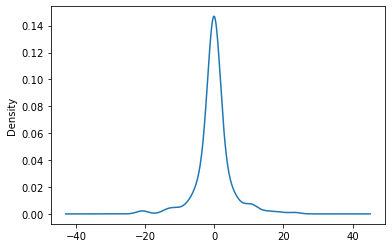

In [10]:
#courbe de la densite de la migration
df['Net migration'].plot.density()

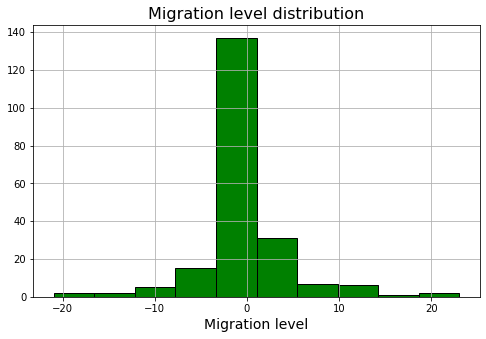

In [11]:
#histogramme de la migration
plt.figure(figsize=(8,5))
plt.title("Migration level distribution",fontsize=16)
plt.xlabel ("Migration level",fontsize=14)
plt.grid(True)
plt.hist(df['Net migration'],color='green',edgecolor='k')
plt.show()

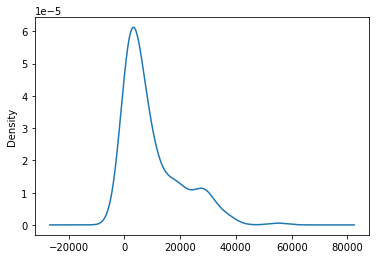

In [12]:
#courbe de la densite du GDP
df['GDP ($ per capita)'].plot.density()

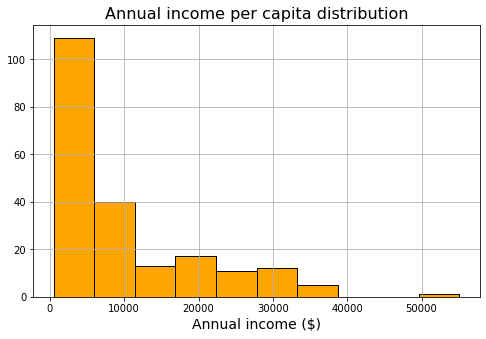

In [13]:
#histogramme du GDP
plt.figure(figsize=(8,5))
plt.title("Annual income per capita distribution",fontsize=16)
plt.xlabel ("Annual income ($)",fontsize=14)
plt.grid(True)
plt.hist(df['GDP ($ per capita)'],color='orange',edgecolor='k')
plt.show()

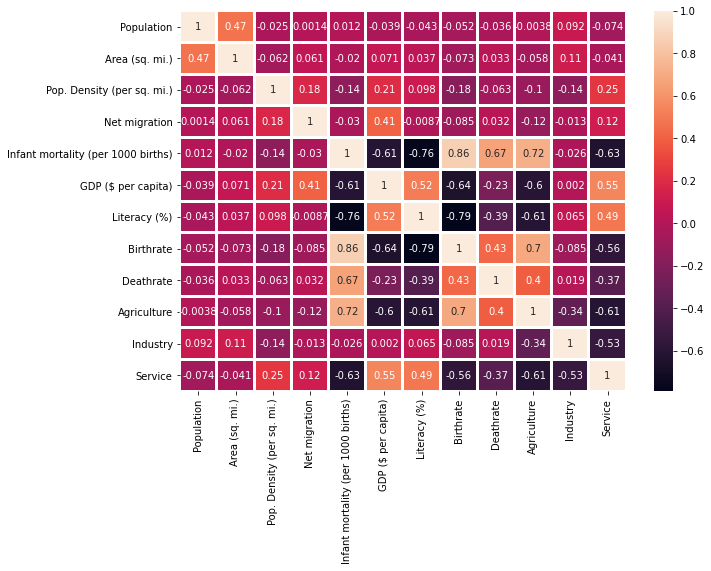

In [14]:
#Heatmap du dataset pour afficher la correlation entre les variables deux a deux
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=2)

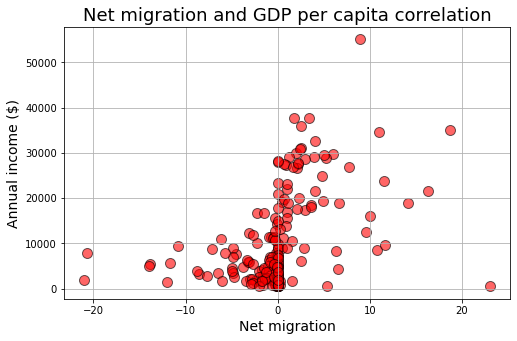

In [15]:
#Graphe representant la orrelation entre la migration et le GDP
plt.figure(figsize=(8,5))
plt.title("Net migration and GDP per capita correlation",fontsize=18)
plt.xlabel ("Net migration",fontsize=14)
plt.ylabel ("Annual income ($)",fontsize=14)
plt.grid(True)
plt.scatter(df['Net migration'],df['GDP ($ per capita)'],color='red',edgecolor='k',alpha=0.6, s=100)
plt.show()
#d'apres le graphe==>On peut conclure qu'il y a une correlation entre la migration et le GDP

In [16]:
df['m']=pd.cut(df['Net migration'],20,labels=[-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,7,8,9,10])
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Birthrate,Deathrate,Agriculture,Industry,Service,migration,m
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,23.06,163.07,700,36.0,46.60,20.34,0.380,0.240,0.380,High,10
1,Albania,EASTERN EUROPE,3581655,28748,124.6,-4.93,21.52,4500,86.5,15.11,5.22,0.232,0.188,0.579,Below_average,-3
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,-0.39,31.00,6000,70.0,17.14,4.61,0.101,0.600,0.298,Average,-1
3,American Samoa,OCEANIA,57794,199,290.4,-20.71,9.27,8000,97.0,22.46,3.27,NaN,NaN,NaN,Low,-10
4,Andorra,WESTERN EUROPE,71201,468,152.1,6.60,4.05,19000,100.0,8.71,6.25,NaN,NaN,NaN,Above_Average,3


In [17]:
W = df.iloc[:,[7,15]].values

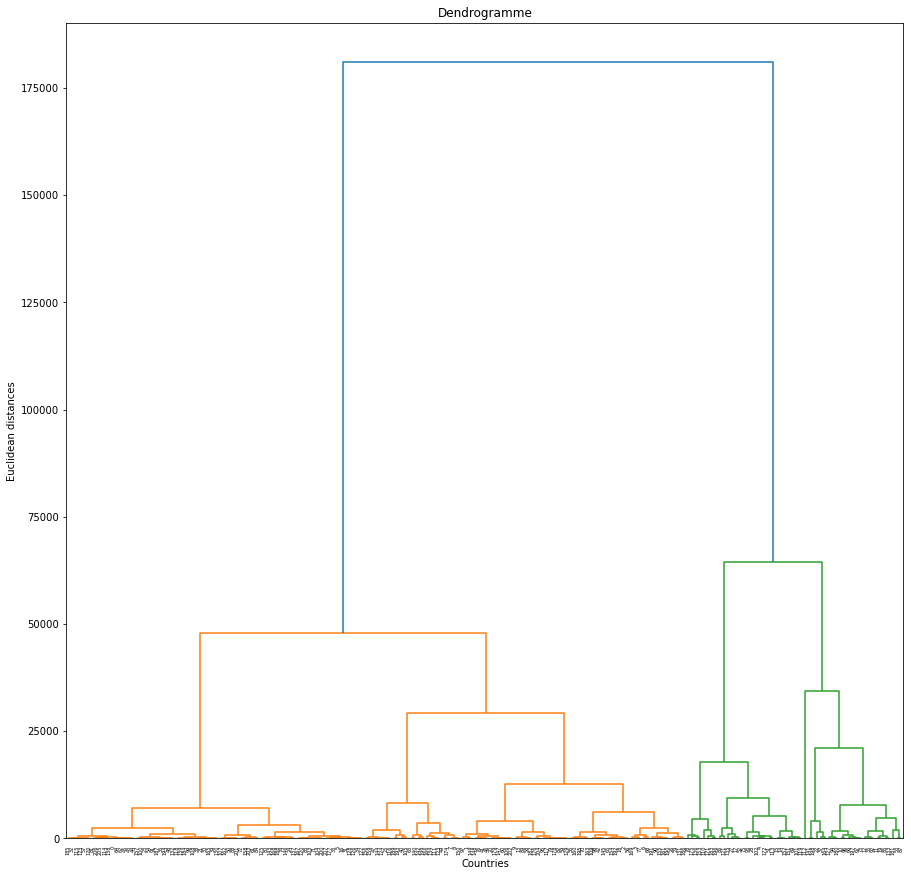

In [18]:
#Dendogramme de la CAH
plt.figure(figsize=(15,15))
plt.title('Dendrogramme')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(W, method = 'ward'))
plt.show()


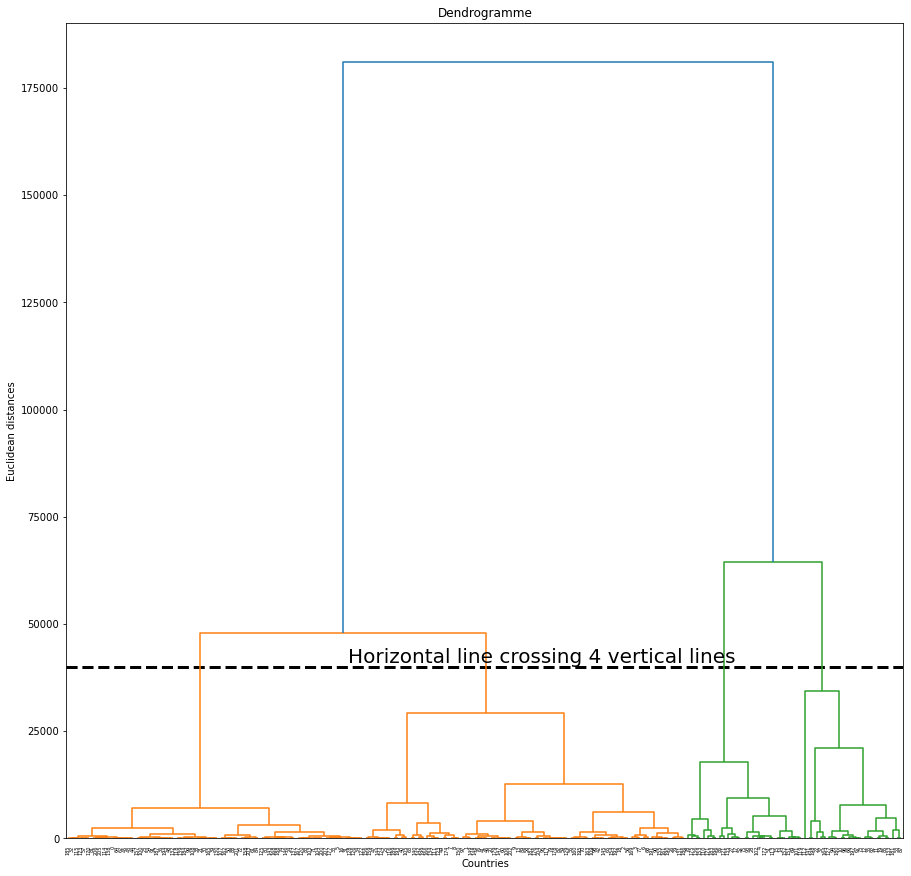

In [19]:
#depuis le graphe on conclut que le nombre optimal de clusters est soit 4 soit 2
#on choisit 4
plt.figure(figsize=(15,15))
plt.title('Dendrogramme')
plt.xlabel('Countries')
plt.ylabel('Euclidean distances')
plt.hlines(y=40000,xmin=0,xmax=2400,lw=3,linestyles='--')
plt.text(x=700,y=41000,s='Horizontal line crossing 4 vertical lines',fontsize=20)
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(W, method = 'ward'))
plt.show()

In [20]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(W)

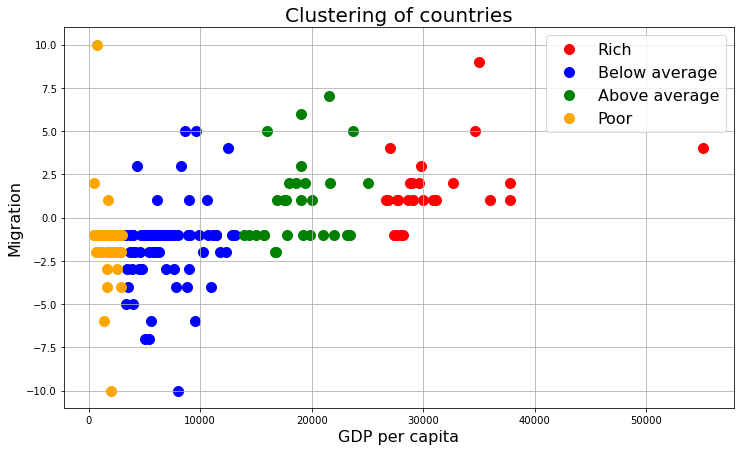

In [31]:
plt.figure(figsize=(12,7))
plt.scatter(W[y_hc == 0, 0], W[y_hc == 0, 1], s = 100, c = 'red', label = 'Rich')
plt.scatter(W[y_hc == 1, 0], W[y_hc == 1, 1], s = 100, c = 'blue', label = 'Below average')
plt.scatter(W[y_hc == 2, 0], W[y_hc == 2, 1], s = 100, c = 'green', label = 'Above average')
plt.scatter(W[y_hc == 3, 0], W[y_hc == 3, 1], s = 100, c = 'orange', label = 'Poor')
plt.title('Clustering of countries',fontsize=20)
plt.xlabel('GDP per capita',fontsize=16)
plt.ylabel('Migration',fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

In [ ]:
#==>On conclut que lorsque le GDP augmente, la migration augmente et devient positive c'est a dire les migrateurs arrivants 
#a ce pays son plus que les migrateurs sortants. 

In [24]:
#Fractionner le dataset en entités et en variable cible
feature_cols=['Pop. Density (per sq. mi.)','GDP ($ per capita)','Literacy (%)']
X=df[feature_cols]
y=df['migration']

In [25]:
#Fractionner le dataset en training set et test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [26]:
#Creation d'un classificateur d'arbre de decision
clf = DecisionTreeClassifier(criterion="entropy",max_depth=4)

In [27]:
#Entrainer le classificateur de l'arbre de decision
clf = clf.fit(X_train,y_train)

In [28]:
#Predire le resultat pour X_test
y_pred = clf.predict(X_test)

In [29]:
#La precision de la prediction de l'arbre de decision
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8571428571428571


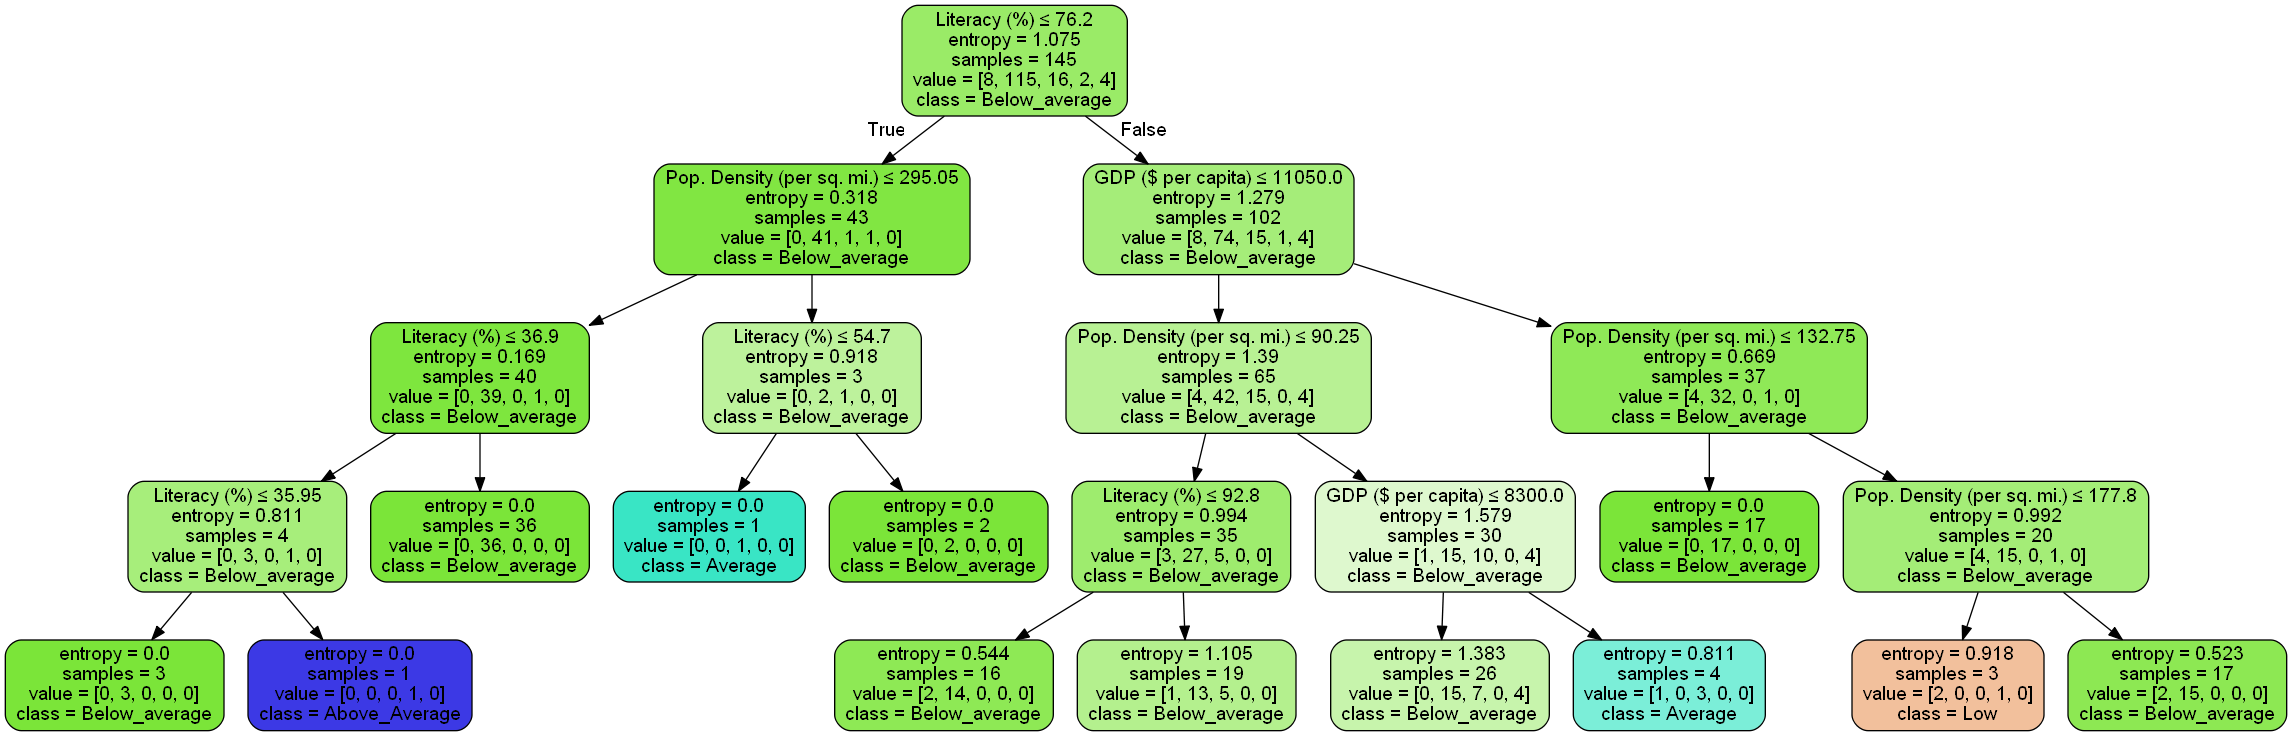

In [30]:
#Tracer l'arbre de decision 
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['Low','Below_average','Average','Above_Average','High'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('migration.png')
Image(graph.create_png())